In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

# Understanding recurrent neural networks

## A first recurrent layer in Keras

The process we just naively implemented in Numpy corresponds to an actual Keras layer: the `SimpleRNN` layer:


In [0]:
from keras.layers import SimpleRNN

一個使用SimpleRNN並僅在最後一個時間點回傳輸出的範例

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


有時, 堆疊多個循環層可以增加神經網路的表現能力

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


在IMDB使用堆疊的模型

Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let's train a simple recurrent network using an `Embedding` layer and a `SimpleRNN` layer:

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.6187 - acc: 0.6541 - val_loss: 0.5145 - val_acc: 0.7700
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.3838 - acc: 0.8396 - val_loss: 0.3745 - val_acc: 0.8376
Epoch 3/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2732 - acc: 0.8929 - val_loss: 0.4404 - val_acc: 0.7908
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2058 - acc: 0.9215 - val_loss: 0.4400 - val_acc: 0.8088
Epoch 5/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1620 - acc: 0.9408 - val_loss: 0.4473 - val_acc: 0.8220
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1145 - acc: 0.9604 - val_loss: 0.5648 - val_acc: 0.8246
Epoch 7/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0735 - acc: 0.9766 - val_loss: 0.4360 - val_acc:

Let's display the training and validation loss and accuracy:

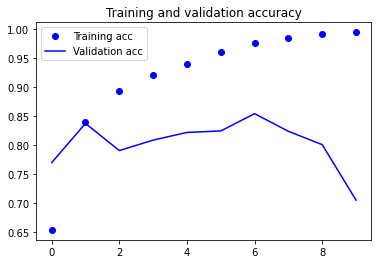

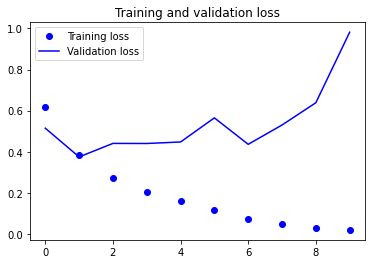

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## A concrete LSTM example in Keras

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.5043 - acc: 0.7635 - val_loss: 0.3266 - val_acc: 0.8658
Epoch 2/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.2893 - acc: 0.8849 - val_loss: 0.3475 - val_acc: 0.8718
Epoch 3/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.2353 - acc: 0.9107 - val_loss: 0.2868 - val_acc: 0.8832
Epoch 4/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.2018 - acc: 0.9255 - val_loss: 0.2842 - val_acc: 0.8834
Epoch 5/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.1774 - acc: 0.9360 - val_loss: 0.3025 - val_acc: 0.8798
Epoch 6/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.1569 - acc: 0.9437 - val_loss: 0.3957 - val_acc: 0.8296
Epoch 7/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.1458 - acc: 0.9479 - val_loss: 0.3000 - val_acc:

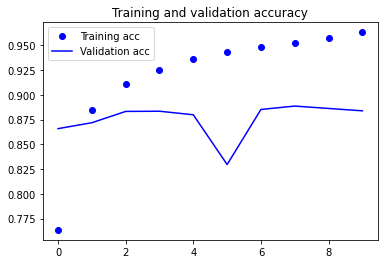

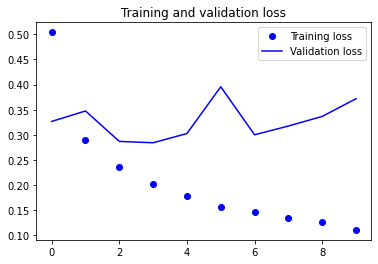

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()